# Wheat Future Market Analysis Report

## Wheat Future Market Overview
#### Symbol Convention
[Base Symbol]+[Month Code]+[Year]

- For example, ```ZWN25``` is the Chicago soft red winter wheat future with expiration in July 2025.
- ```ZW=F``` refers to the **nearest to expiration** Chicago soft red winter wheat futures contract. For example, from March to April, the ```ZW=F``` tracks the May futures ```ZWK```.

#### Quick Summary

| Wheat Type                | Symbol | Key Growing Regions    | Primary Uses                       | Planting Season | Harvest Season | Vulnerable to                              | Expiry Month                           |
|---------------------------|--------|------------------------|------------------------------------|-----------------|----------------|--------------------------------------------|----------------------------------------|
| **Soft Red Winter Wheat** | `ZW`   | IL, IN, OH, MO, KY     | Pastries, cakes, cookies           | Sep-Nov         | May-Jul        | cold damage & drought                      | Mar, May, Jul, Sep, Dec (H, K, N, U Z) |
| **Hard Red Winter Wheat** | `KE`   | Central U.S. (Plains)  | Bread, rolls, all-purpose flour    | Sep-Oct         | Jun-Jul        | cold damage & drought                      | Mar, May, Jul, Sep, Dec (H, K, N, U Z) |
| **Hard Red Spring Wheat** | `MW`   | Northern U.S. & Canada | Premium bread, bagels, pizza dough | Apr-May         | Aug-Sep        | wet planting conditions summer heat stress | Mar, May, Jul, Sep, Dec (H, K, N, U Z) |

#### Geopolitical & Export Demand
- Hard Red Winter & Spring Wheat are key U.S. exports (buyers include China, Mexico, and Egypt).
- Russia and Ukraine produce competing wheat types, affecting global prices.

#### Last trading day
- The business day before the 15th calendar day of the contract month. Usually, it would be the 14th of that day at 1:20pm CT.
- The wheat is already in the warehouse before the expiration date. Once the ownership is transferred to the long trader, the long trader must pay the storage fees.
- After the last trading day, the buyer of the contract must take delivery. This will incur daily warehouse fee, handling fees and delivery fees.
- Most trades will close their positions before the First Notice day, or the last trading day.

In [163]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import periodogram
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.cm as cm

from src.data.preprocess import extend_market_data
from src.data import DataLoader

## Market Data Analysis

In [164]:
# Obtaining the nearest to expiration wheat future
SRW = yf.Ticker("ZW=F")
HRW = yf.Ticker("KE=F")
SRW_data = SRW.history(start ="2019-01-01").drop(['Dividends', 'Stock Splits'], axis=1)
HRW_data = HRW.history(start ="2019-01-01").drop(['Dividends', 'Stock Splits'], axis=1)

SRW_data = extend_market_data(SRW_data)
HRW_data = extend_market_data(HRW_data)

SRW_data['30D_Volatility'] = SRW_data['Log_Return'].rolling(window=30).std()
HRW_data['30D_Volatility'] = HRW_data['Log_Return'].rolling(window=30).std()
SRW_data['Expiry_Month'] = SRW_data.expiry.dt.month
SRW_data['7D_Log_Return'] = np.log(SRW_data['Close']/SRW_data['Close'].shift(7))
HRW_data['7D_Log_Return'] = np.log(HRW_data['Close']/HRW_data['Close'].shift(7))
HRW_data['Expiry_Month'] = HRW_data.expiry.dt.month

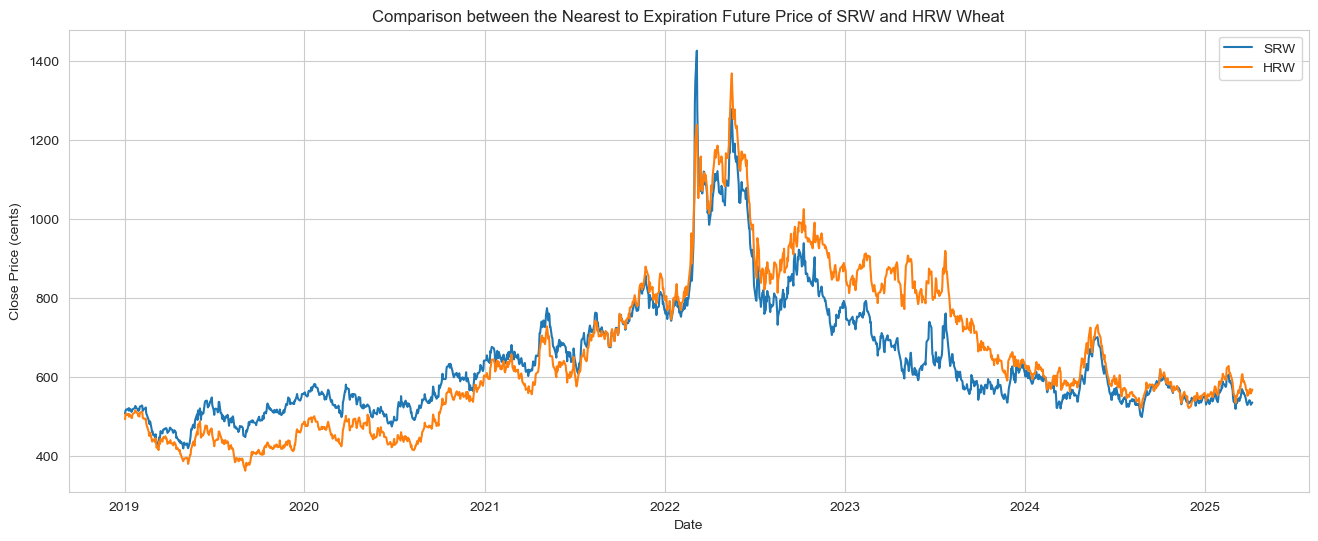

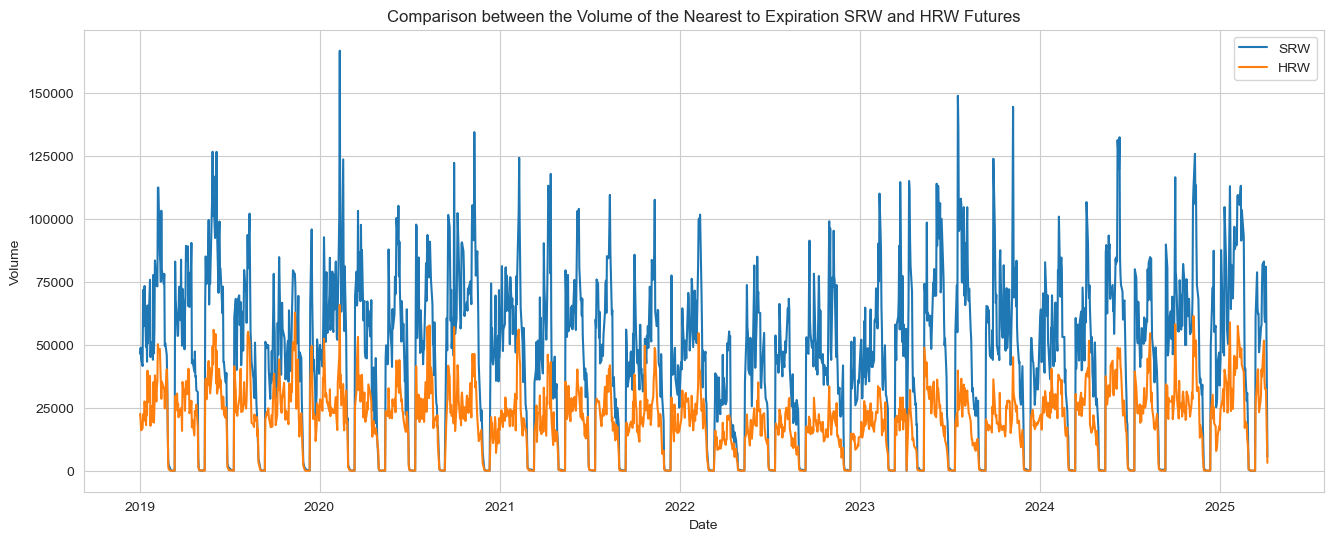

In [165]:
plt.figure(figsize=(16,6))
plt.title("Comparison between the Nearest to Expiration Future Price of SRW and HRW Wheat")

sns.lineplot(x = 'Date', y = 'Close', data = SRW_data, label = "SRW")
sns.lineplot(x = 'Date', y = 'Close', data = HRW_data, label = "HRW")
plt.ylabel('Close Price (cents)')
# plt.savefig('../imgs/wheat/price.png')
plt.show()

plt.figure(figsize=(16, 6))
plt.title("Comparison between the Volume of the Nearest to Expiration SRW and HRW Futures")
sns.lineplot(SRW_data['Volume'], label = "SRW")
sns.lineplot(HRW_data['Volume'], label = "HRW")
plt.show()

### Wheat Futures Price Trends (Historical Perspective)
- **SRW and HRW wheat futures exhibit similar price trends**, indicating strong correlation in their market movements.
- **A sharp price surge occurred in 2022**, primarily driven by the **Russia-Ukraine war**, which disrupted global
  wheat supply chains.
- Another **significant spike in May 2024** resulted from a combination of **frost damage in key European
  wheat-producing regions** and **drought conditions across North America**. For more details, see this
  [report](https://www.chemanalyst.com/NewsAndDeals/NewsDetails/the-perfect-storm-factors-fueling-the-surge-in-global-wheat-prices-in-q2-of-2024-27869)


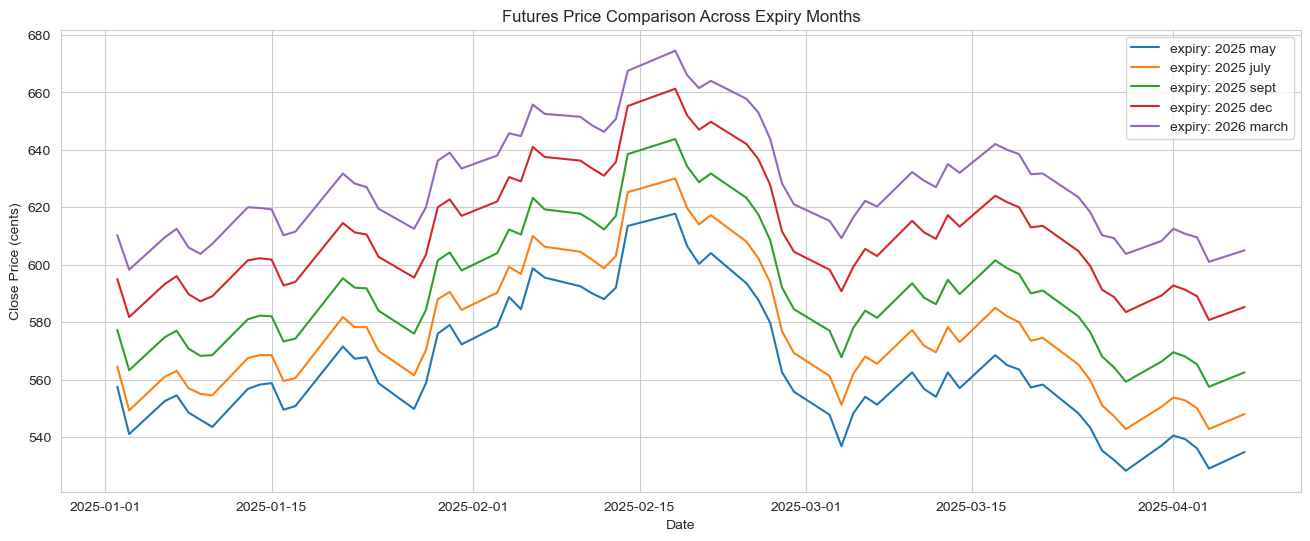

In [166]:
march = yf.Ticker("ZWH26.CBT").history(start ="2025-01-01")
may = yf.Ticker("ZWK25.CBT").history(start ="2025-01-01")
july = yf.Ticker("ZWN25.CBT").history(start ="2025-01-01")
sept = yf.Ticker("ZWU25.CBT").history(start ="2025-01-01")
dec = yf.Ticker("ZWZ25.CBT").history(start ="2025-01-01")


# plt.figure(figsize = (10,5.6))
plt.figure(figsize=(16,6))
plt.title("Futures Price Comparison Across Expiry Months")
sns.lineplot(x = 'Date', y = 'Close', data = may, label = "expiry: 2025 may")
sns.lineplot(x = 'Date', y = 'Close', data = july, label = "expiry: 2025 july")
sns.lineplot(x = 'Date', y = 'Close', data = sept, label = "expiry: 2025 sept")
sns.lineplot(x = 'Date', y = 'Close', data = dec, label = "expiry: 2025 dec")
sns.lineplot(x = 'Date', y = 'Close', data = march, label = "expiry: 2026 march")
plt.ylabel('Close Price (cents)')
# plt.savefig('../imgs/wheat/price_expiry_month_comparison.png')
plt.show()

### Contango Market Structure
- The futures contracts with later expiration dates trade at higher prices than near-term contracts. This is usually
  called a **contango market**.
- Contango typically occurs due to the following factors:
  1. **Storage Costs** - Longer holding periods increase storage expenses.
  2. **Financing Costs (Interest Rates)**
  3. **Insurance & Transportation Costs** - Longer storage requires insurance against spoilage, theft, or contamination.
  4. **Market Expectations** -  Anticipation of rising wheat prices can drive up futures prices for later contracts.


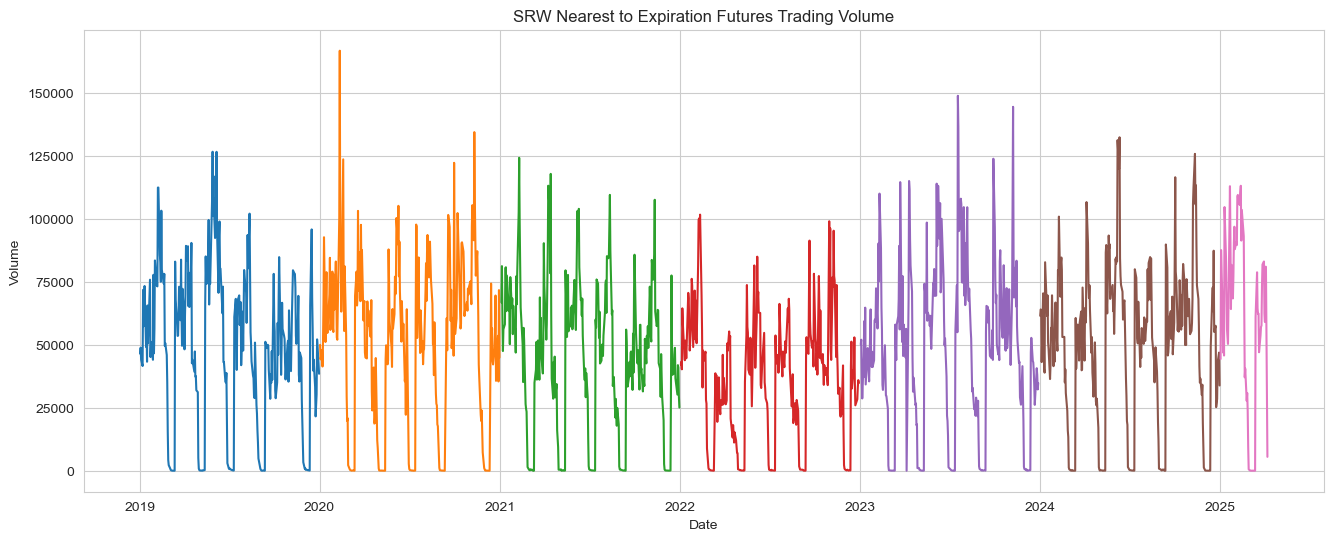

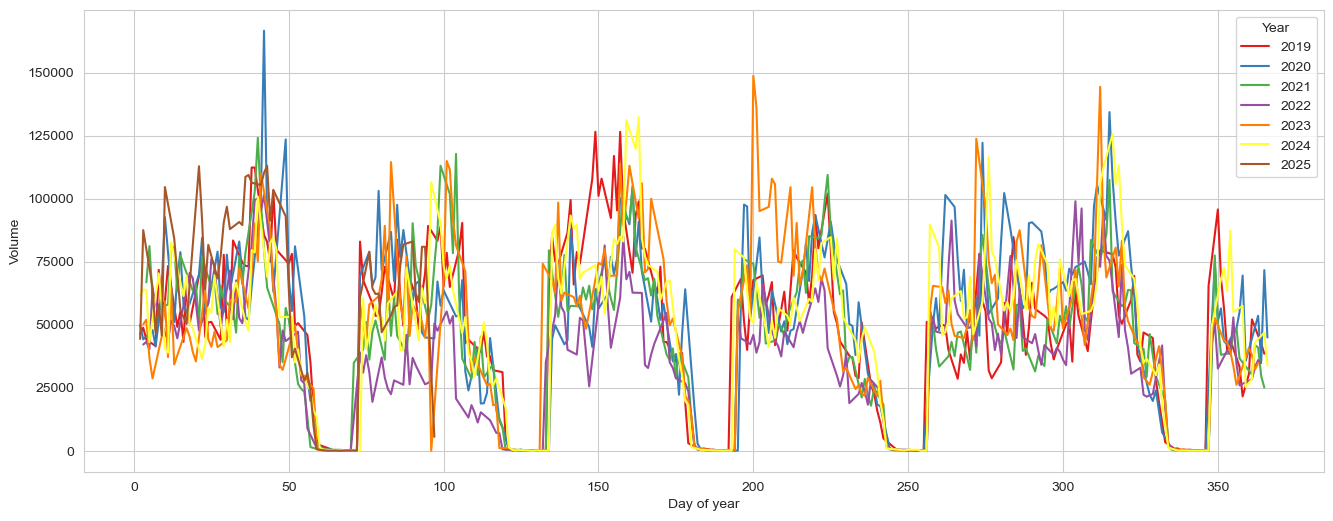

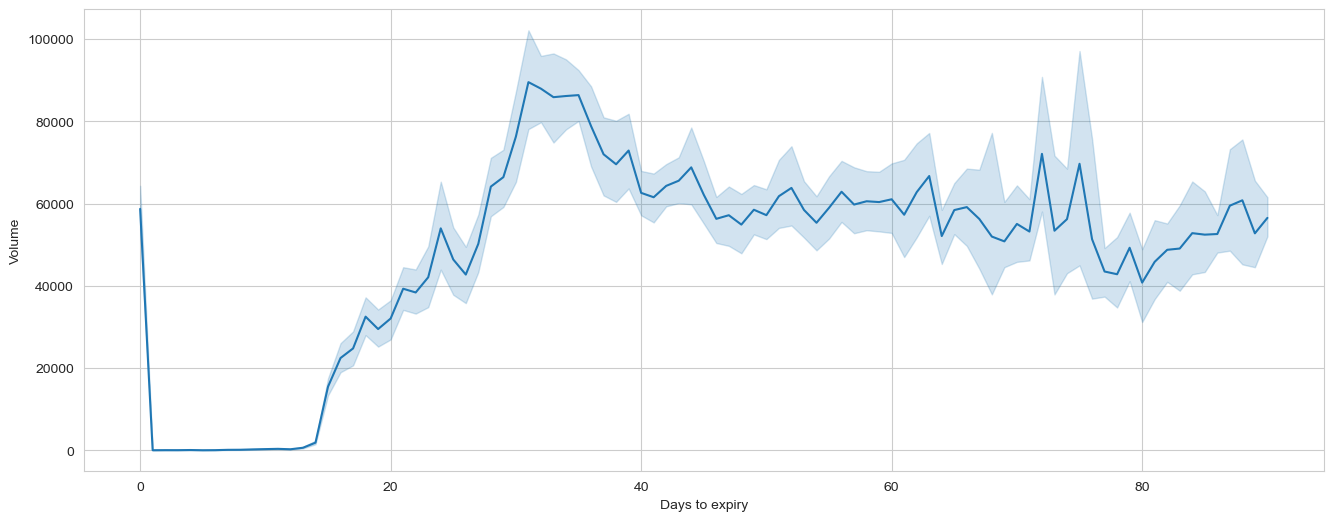

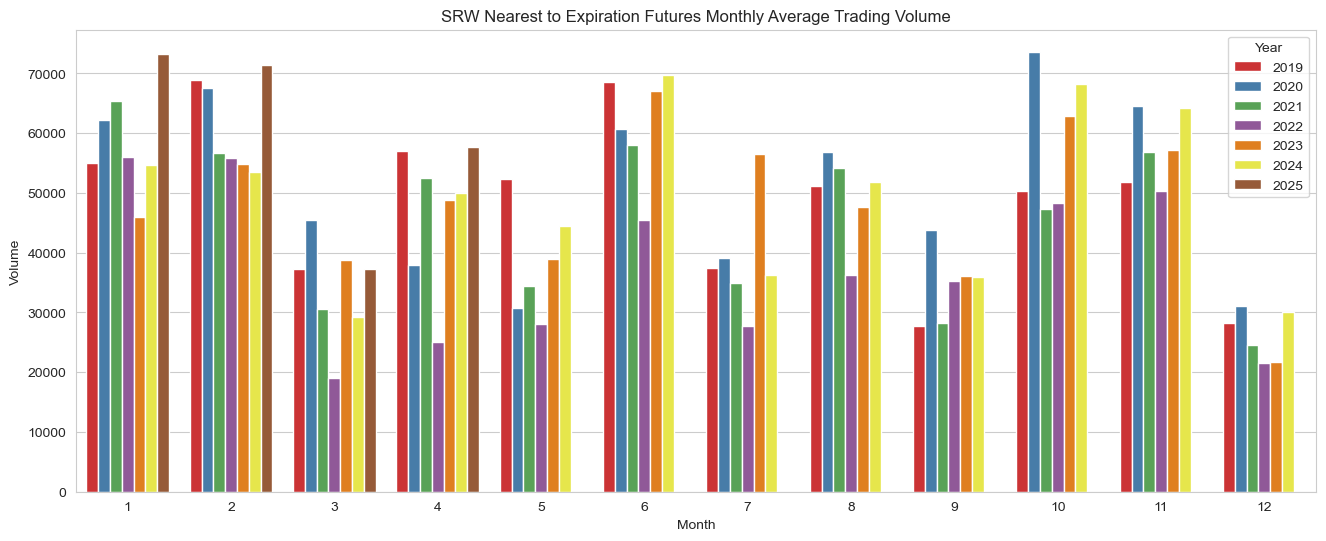

In [167]:
plt.figure(figsize = (16,6))
plt.title("SRW Nearest to Expiration Futures Trading Volume")
for year in SRW_data['Year'].unique():
    yearly_data = SRW_data[SRW_data['Year'] == year]
    sns.lineplot(x = 'Date', y = 'Volume', data = yearly_data)
plt.show()

plt.figure(figsize = (16,6))
sns.lineplot(x = 'Day_Of_Year', y = 'Volume', data = SRW_data, hue ='Year', palette='Set1')
plt.xlabel('Day of year')
plt.show()

plt.figure(figsize = (16,6))
sns.lineplot(x = 'DTE', y = 'Volume', data = SRW_data)
plt.xlabel('Days to expiry')
plt.show()

monthly_average = SRW_data.groupby(['Year', 'Month']).Volume.agg('mean').reset_index()
plt.figure(figsize = (16,6))
plt.title("SRW Nearest to Expiration Futures Monthly Average Trading Volume")
sns.barplot(x = 'Month', y = 'Volume', data = monthly_average, hue = 'Year', palette='Set1')
plt.show()

# The following is code to generate the image used for html display of the EDA

# fig, axes = plt.subplots(2, figsize=(10,5.6))
# for year in SRW_data['Year'].unique():  # Loop through each unique year
#     yearly_data = SRW_data[SRW_data['Year'] == year]
#     sns.lineplot(x = 'Date', y = 'Volume', data = yearly_data, ax = axes[0])
#
# sns.lineplot(x = 'DTE', y = 'Volume', data = SRW_data, ax = axes[1])
# axes[0].set_title("Trading Volume of the SRW Nearest to Expiration Future")
# axes[0].set_xlabel('')
# axes[1].set_xlabel('Days to Expiry')
# plt.savefig('../imgs/wheat/volume.png')
# plt.show()

### Trading Volume Analysis
- **Seasonal patterns** are evident in trading volume, reflecting recurring market behavior.
- **Declining volume as expiry nears** – Many traders reduce activity in expiring contracts, shifting focus to
  later-dated futures instead of speculating on short-term price movements.
- **Pre-expiry volume surge** – As the expiry date approaches, traders must close positions to avoid physical delivery.
  This leads to a temporary spike in trading volume before the last trading day.
- **High trading volume in 2025** - The trading volume in 2025 Q1 is higher than the trading volume in previous years.


/var/folders/2h/69hg_xrd4fb4nytgmwvn8ch40000gn/T/ipykernel_1588/3159171447.py:13: RuntimeWarning: divide by zero encountered in divide
  ax[1].plot(1 / frequencies, power)


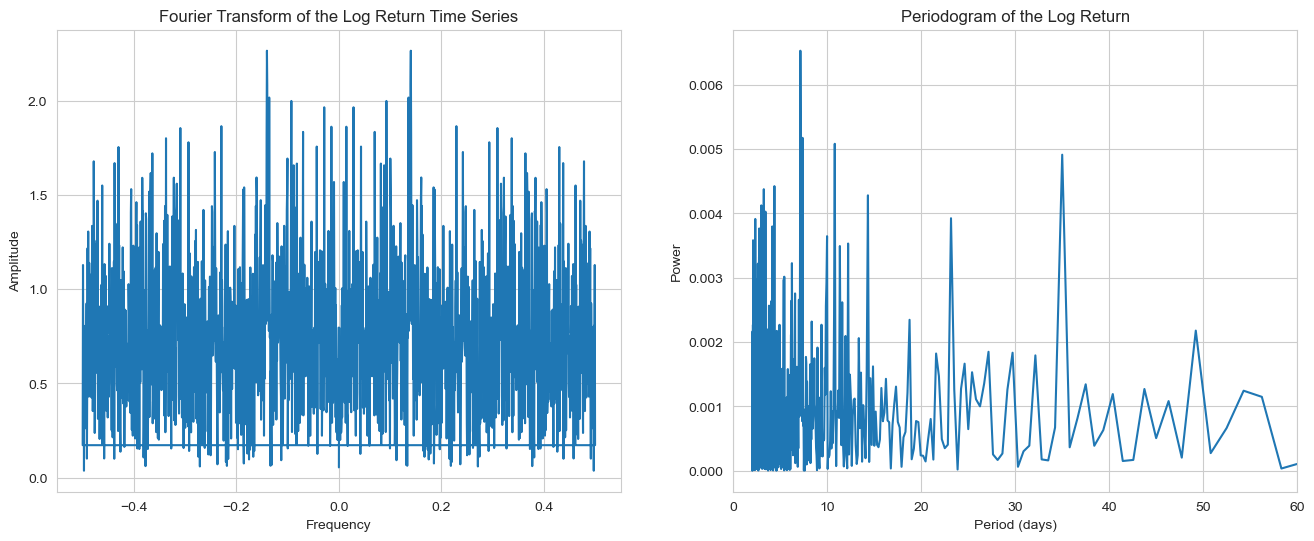

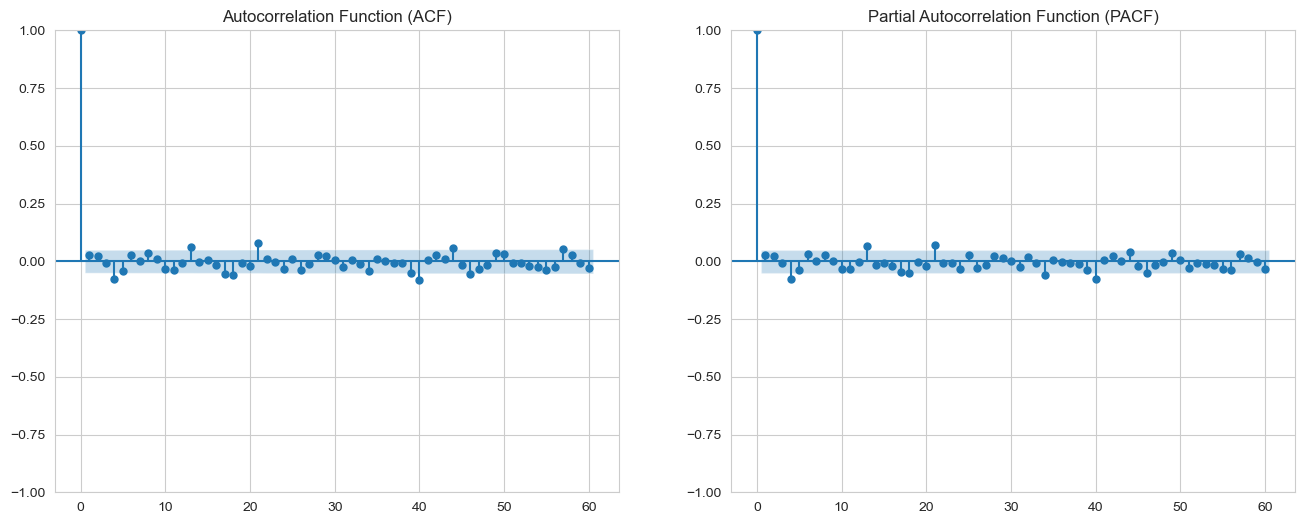

In [168]:
fig, ax = plt.subplots(ncols=2, figsize = (16,6))
log_returns = SRW_data['Log_Return'].dropna()

fft_values = np.fft.fft(log_returns)
frequencies = np.fft.fftfreq(len(log_returns))

ax[0].plot(frequencies, np.abs(fft_values))
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Amplitude')
ax[0].set_title('Fourier Transform of the Log Return Time Series')

frequencies, power = periodogram(log_returns)
ax[1].plot(1 / frequencies, power)
ax[1].set_xlabel("Period (days)")
ax[1].set_ylabel("Power")
ax[1].set_title("Periodogram of the Log Return")
ax[1].set_xlim(0, 60)  # Limit x-axis to reasonable periods

# plt.savefig('../imgs/wheat/seasonality.png')
plt.show()

fig, ax = plt.subplots(ncols=2, figsize = (16,6))
plot_acf(log_returns, ax=ax[0], lags=60, title='Autocorrelation Function (ACF)')
plot_pacf(log_returns, ax=ax[1], lags=60, title='Partial Autocorrelation Function (PACF)', method='ywm')
plt.show()

### Spectral Analysis of Wheat Futures Log Returns
To investigate the presence of seasonality or cyclic behavior in the wheat futures market, we applied Fourier
Transform (FFT) and periodogram analysis to the log returns of the close price.
- **No clear seasonality** – Fourier and periodogram analysis show no dominant cycles in the log returns of wheat
  futures.
- **Lack of sharp peaks** – The periodogram exhibits no strong periodic components, suggesting price changes are not
  driven by regular seasonal patterns.
- **Market randomness confirmed** – This supports the view that wheat futures prices are influenced more by
  fundamentals than by predictable cycles.

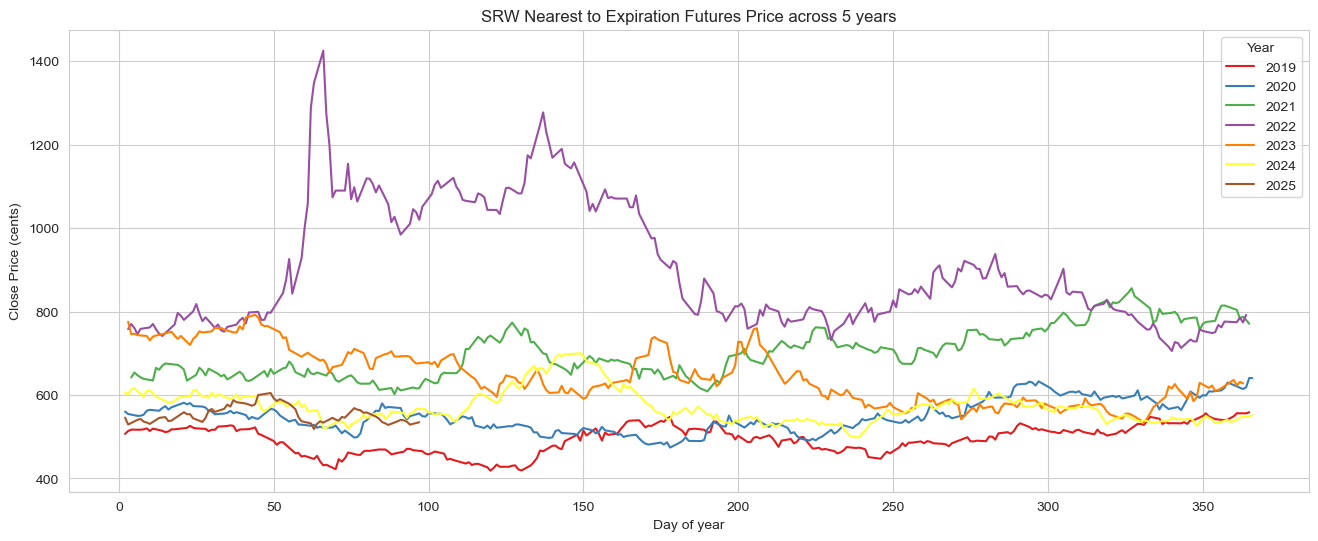

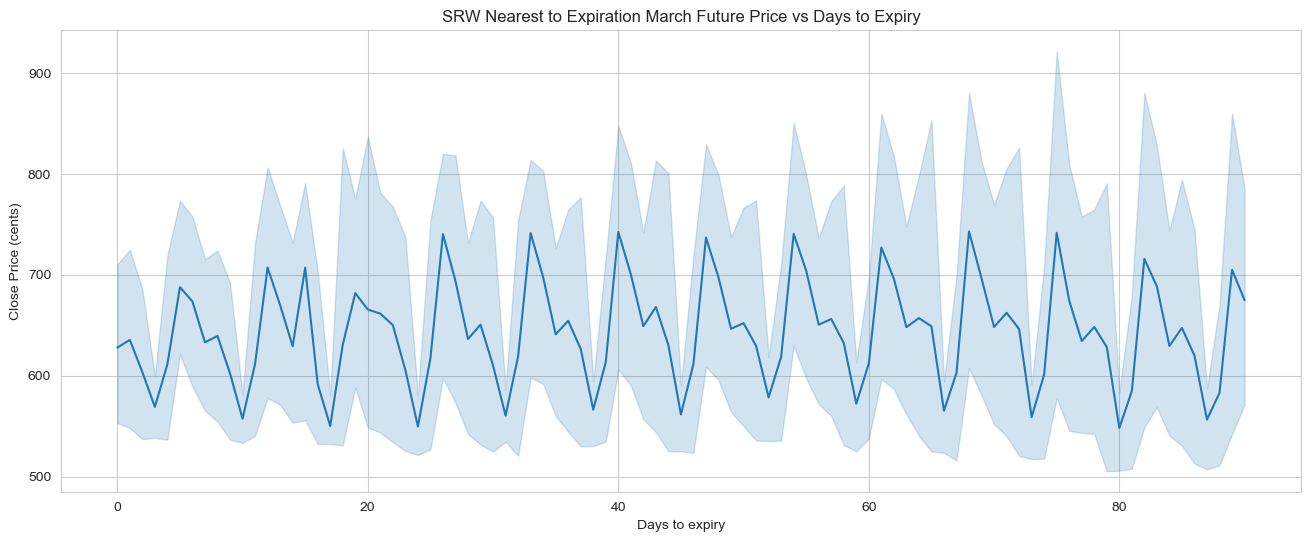

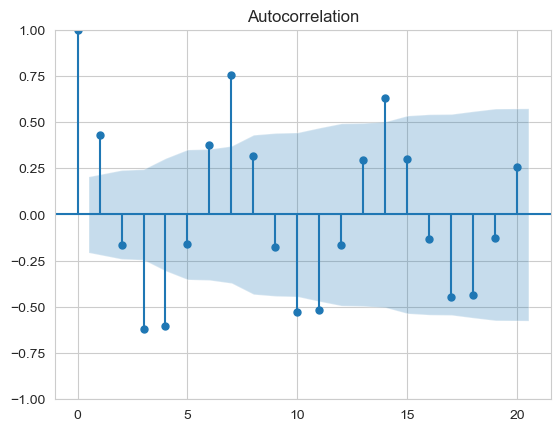

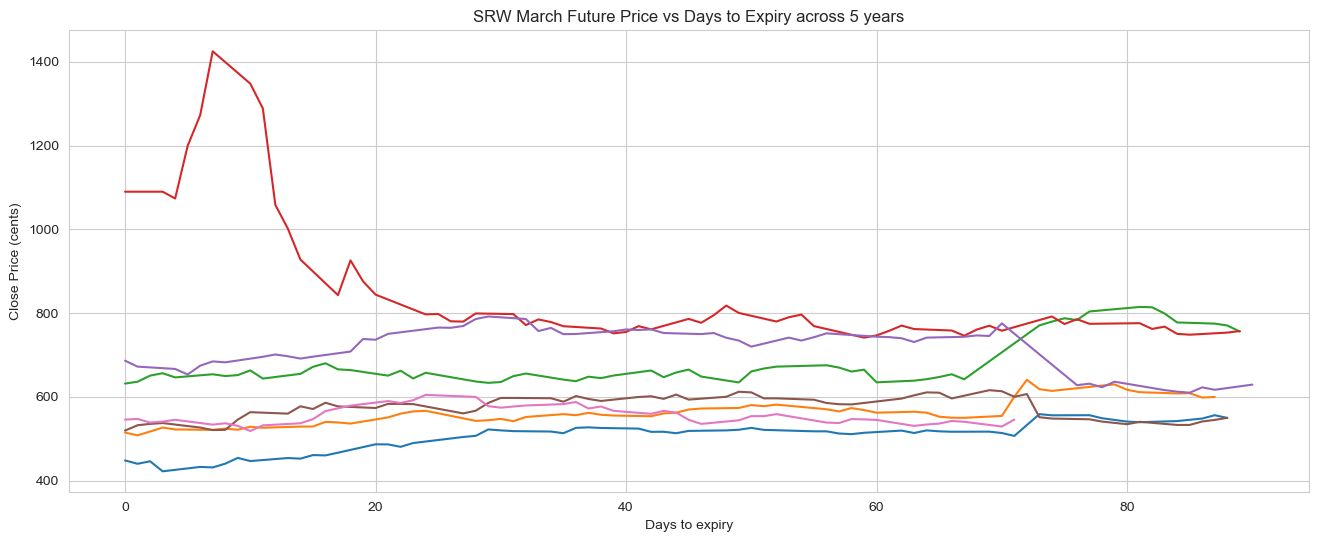

In [169]:
plt.figure(figsize = (16,6))
plt.title('SRW Nearest to Expiration Futures Price across 5 years')
sns.lineplot(x = 'Day_Of_Year', y = 'Close', data = SRW_data, hue ='Year', palette='Set1')
plt.ylabel('Close Price (cents)')
plt.xlabel('Day of year')
plt.show()

# for expiry_month in [3,5,7,9,12]:
expiry_month = 3
plt.figure(figsize = (16,6))
plt.title('SRW Nearest to Expiration March Future Price vs Days to Expiry')
sns.lineplot(x = 'DTE', y = 'Close', data = SRW_data[SRW_data.Expiry_Month==12])
plt.ylabel('Close Price (cents)')
plt.xlabel('Days to expiry')
plt.show()

plot_acf(SRW_data[SRW_data.Expiry_Month==expiry_month][['Close', 'DTE']].groupby('DTE').Close.mean())
plt.show()

plt.figure(figsize = (16,6))
plt.title("SRW March Future Price vs Days to Expiry across 5 years")
for year in SRW_data['Year'].unique():
    plt.plot(SRW_data[(SRW_data.Expiry_Month==3) & (SRW_data.Year == year)][['Close', 'DTE']].groupby('DTE').Close.mean())
plt.ylabel('Close Price (cents)')
plt.xlabel('Days to expiry')
plt.show()

## Fake Seasonality in Days-to-Expiry Price Analysis
During the analysis of SRW wheat futures prices with respect to days to expiry, a seemingly periodic pattern emerged. However, upon closer examination, it was found that this periodicity was an **artifact of data misalignment rather than an actual market behavior**.

#### Cause of the Artificial Periodicity
The dataset spans multiple years, but for each contract month (e.g., March), the available **days to expiry** are not uniformly distributed across different years. For example:

- In 2023, the March contract might not have trading data for days-to-expiry values like 2, 3, 9, or 10.
- The prices on those missing days in the combined dataset actually belong to a different year’s contract.

Since each contract experiences different market conditions and price dynamics, aggregating multiple years **without proper alignment** introduces a false pattern that appears periodic but is actually caused by data gaps.

## Supply and Demand Analysis

In [170]:
dl = DataLoader()

production_raw = dl.get_production_data("WHEAT", 2018, national_level=True, raw=True)
production_national = production_raw[
    (production_raw.unit_desc == 'BU')
    & (production_raw.short_desc == 'WHEAT, WINTER - PRODUCTION, MEASURED IN BU')
    & (production_raw.domain_desc == 'TOTAL')
    & (production_raw.reference_period_desc == 'YEAR')
][['state_name', 'Value', 'unit_desc', 'year', 'reference_period_desc', 'source_desc', 'short_desc']]

production_national['year'] = pd.to_numeric(production_national['year'])
production_national['Value'] = production_national['Value'].str.replace(',', '', regex=True)
production_national['Value'] = pd.to_numeric(production_national['Value'], errors='coerce')

stocks_national_raw = dl.get_stocks_data('WHEAT', 2018, True)
stocks_national_raw['end_month'] = stocks_national_raw['end_month'].astype(int)
stocks_national = stocks_national_raw[['year', 'end_month', 'WHEAT - STOCKS, MEASURED IN BU', 'WHEAT, OFF FARM - STOCKS, MEASURED IN BU', 'WHEAT, ON FARM - STOCKS, MEASURED IN BU']]
stocks_national = stocks_national.rename(columns={
    'WHEAT - STOCKS, MEASURED IN BU': 'Total',
    'WHEAT, ON FARM - STOCKS, MEASURED IN BU': 'ON_FARM',
    'WHEAT, OFF FARM - STOCKS, MEASURED IN BU': 'OFF_FARM',
})

/var/folders/2h/69hg_xrd4fb4nytgmwvn8ch40000gn/T/ipykernel_1588/2661280002.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', num_years)


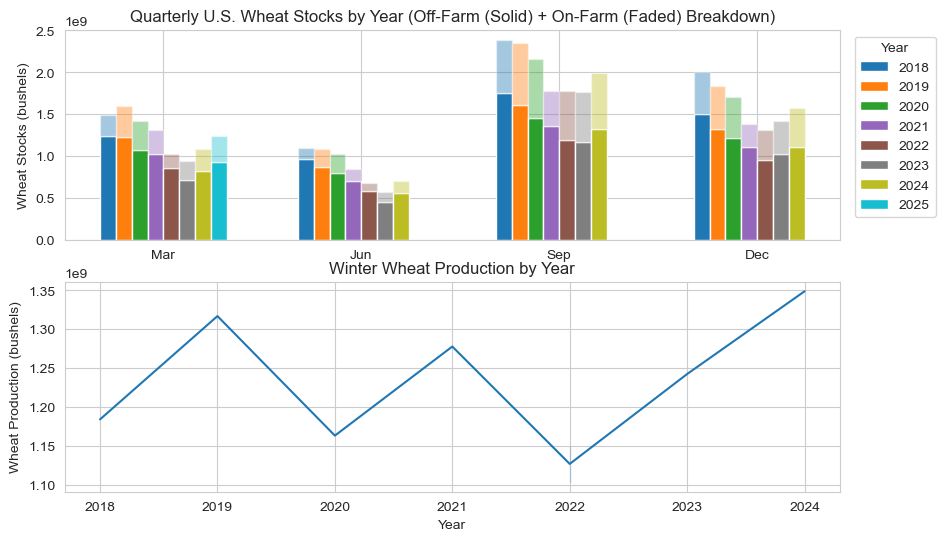

In [171]:
month_map = {3: "Mar", 6: "Jun", 9: "Sep", 12: "Dec"}
stocks_national['month'] = stocks_national['end_month'].map(month_map)
months = ['Mar', 'Jun', 'Sep', 'Dec']
stocks_national['month'] = pd.Categorical(stocks_national['month'], categories=months, ordered=True)
stocks_national = stocks_national.sort_values(['month', 'year'])
years = sorted(stocks_national['year'].unique())
num_years = len(years)
bar_width = 0.08
positions = np.arange(len(months))

# Generate color map for each year
colors = cm.get_cmap('tab10', num_years)

fig, axes = plt.subplots(nrows=2, figsize=(10, 6))

ax=axes[0]
for i, year in enumerate(years):
    df_year = stocks_national[stocks_national['year'] == year]

    # Only include months that actually exist in this year's data
    valid_months = df_year['month'].tolist()
    month_indices = [months.index(m) for m in valid_months]

    offset = (i - num_years/2) * bar_width + bar_width/2
    x = np.array(month_indices) + offset

    # Fetch corresponding values in order
    on_farm_vals = df_year['ON_FARM'].values
    off_farm_vals = df_year['OFF_FARM'].values

    # Plot stacked bars
    ax.bar(x, off_farm_vals, width=bar_width, color=colors(i), label=f'{year}')
    ax.bar(x, on_farm_vals, width=bar_width, bottom=off_farm_vals, color=colors(i), alpha=0.4)

ax.set_xticks(positions)
ax.set_xticklabels(months)
# ax.set_xlabel("Month")
ax.set_ylabel("Wheat Stocks (bushels)")
ax.set_title("Quarterly U.S. Wheat Stocks by Year (Off-Farm (Solid) + On-Farm (Faded) Breakdown)")
ax.legend(title="Year", bbox_to_anchor=(1.01, 1), loc='upper left')
# plt.tight_layout()
# plt.show()

# plt.figure(figsize=(12, 6))


sns.lineplot(x='year', y='Value', data=production_national, ax=axes[1])
axes[1].set_title("Winter Wheat Production by Year")
axes[1].set_ylabel("Wheat Production (bushels)")
axes[1].set_xlabel("Year")

plt.savefig('../imgs/wheat/production_stock.png')
plt.show()

### Wheat Production & Stocks
- **Consistent drawdown (2018–2023)** – Wheat stocks declined steadily across all four USDA reporting quarters (March,
  June, September, December), reflecting tighter supply conditions and strong demand.
- **Stock recovery begins in 2024** – Starting in 2024, wheat stocks began to rise, reversing a six-year downward
  trend. By March 2025, wheat stocks reached their **highest level in four years**.
- **Winter wheat production rebound** – The recovery in stocks is supported by an increase in winter wheat production,
  which began in 2024, driven by expanded planted acreage and improved yields. See this [report](https://www.ers.usda.gov/data-products/charts-of-note/chart-detail?chartId=110909).


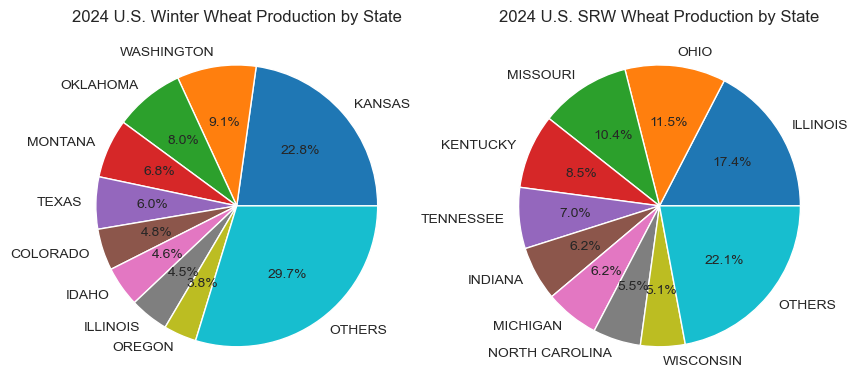

In [172]:
production_state_raw = dl.get_production_data("WHEAT", 2018, national_level=False, raw=True)

year = 2024
production_state = production_state_raw[
    (production_state_raw.unit_desc.isin(['BU', 'PCT BY TYPE'])) &
    (production_state_raw.reference_period_desc == 'YEAR') &
    (production_state_raw.year == year)
][['state_alpha', 'state_name', 'Value', 'unit_desc', 'class_desc']]

production_state['Value'] = production_state['Value'].str.replace(',', '', regex=True)
production_state['Value'] = pd.to_numeric(production_state['Value'], errors='coerce')


fig, axes = plt.subplots(ncols=2, figsize=(10, 5.6))

# ploting the production for winter wheat by state
ax = axes[0]

winter_production_state = production_state[production_state.class_desc=='WINTER'].sort_values('Value', ascending=False)
threshold = 48000000
major = winter_production_state[winter_production_state['Value'] >= threshold]
other = winter_production_state[winter_production_state['Value'] < threshold]
other_sum = other.Value.sum()

df_pie = pd.concat([
    major[['state_name', 'Value']],
    pd.DataFrame({'state_name': ['OTHERS'], 'Value': [other_sum]})
])

ax.set_title(f"{year} U.S. Winter Wheat Production by State")
ax.pie(df_pie.Value, labels=df_pie.state_name, autopct='%1.1f%%')

# ploting the production for winter wheat by state
ax = axes[1]

SRW_production_pct_state = production_state[production_state.class_desc=='WINTER, RED, SOFT'][['state_name', 'Value']]
total_production_state = production_state[production_state.class_desc=='ALL CLASSES'][['state_name', 'Value']]
SRW_production_state = pd.merge(SRW_production_pct_state, total_production_state, on='state_name', how='left')
SRW_production_state['Value'] = SRW_production_state['Value_x'] * SRW_production_state['Value_y'] / 100
SRW_production_state.sort_values('Value', ascending=False, inplace=True)
threshold = 15000000
major = SRW_production_state[SRW_production_state['Value'] >= threshold]
other = SRW_production_state[SRW_production_state['Value'] < threshold]
other_sum = other.Value.sum()

df_pie = pd.concat([
    major[['state_name', 'Value']],
    pd.DataFrame({'state_name': ['OTHERS'], 'Value': [other_sum]})
])

ax.set_title(f"{year} U.S. SRW Wheat Production by State")
ax.pie(df_pie.Value, labels=df_pie.state_name, autopct='%1.1f%%')

# plt.savefig('../imgs/wheat/production_2024_state.png')
plt.show()

### Winter Wheat Production by Region
- **Winter wheat concentrated in the Plains** – Top producers include **Kansas (22.8%)**, **Washington (9.1%)**,
  **Oklahoma (8.0%)**, and **Montana (6.8%)**, reflecting the dominance of winter wheat in the Central and Great Plains.
- **SRW wheat centered in the Midwest and East** – Leading states are **Illinois (17.4%)**, **Ohio (11.5%)**,
  **Missouri (10.4%)**, and **Kentucky (8.5%)**, where SRW wheat thrives in more humid climates.
- **Focus on key producers for modeling** – We will use weather and crop condition data from these
  major producing states to build the prediction model.

In [173]:
condition_state_raw = dl.get_condition_data('WHEAT', 2018, national_level=False, raw=True)

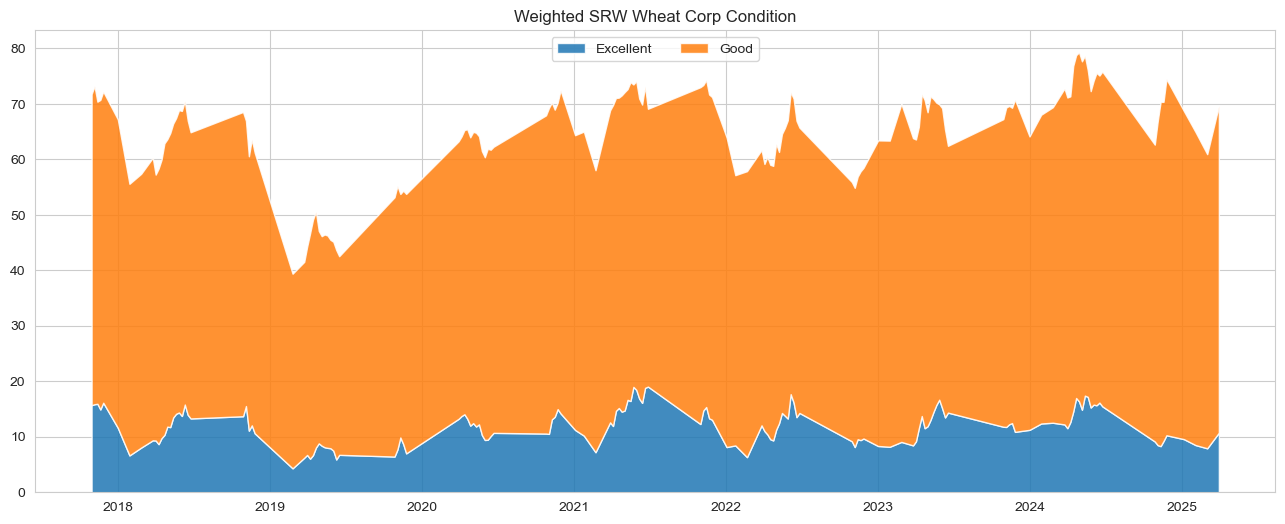

The correlation between the crop condition change and the next day price increment is -0.0593
The correlation between the crop condition change and the next 3 day price increment is -0.1157
The correlation between the crop condition change and the next 7 day price increment is -0.0658


In [174]:
SRW_states_of_interest = SRW_production_state[:9][['state_name', 'Value']]

condition_state_raw['year'] = pd.to_numeric(condition_state_raw['year'])
condition_state_raw['Value'] = pd.to_numeric(condition_state_raw['Value'], errors='coerce')
raw_data = condition_state_raw[
    (condition_state_raw.class_desc == 'WINTER')
    & (condition_state_raw.state_name.isin(SRW_states_of_interest.state_name))
]
condition_state = raw_data.pivot(index=['week_ending', 'year', 'state_name', 'end_code'], columns='unit_desc', values='Value').reset_index()
condition_state.rename(columns={'end_code': 'week_number', 'week_ending': 'date'}, inplace=True)
condition_state.date = pd.to_datetime(condition_state.date)

SRW_states_of_interest = SRW_production_state[:9][['state_name', 'Value']]
SRW_states_of_interest['weight'] = SRW_states_of_interest['Value'] / SRW_states_of_interest['Value'].sum()

# 1. Filter only SRW states
condition_srw = condition_state[condition_state['state_name'].isin(SRW_states_of_interest['state_name'])]

# 2. Merge weights into condition data
condition_srw = condition_srw.merge(SRW_states_of_interest, on='state_name', how='left')

# 3. Compute weighted condition percentages
conditions = ['PCT EXCELLENT', 'PCT GOOD', 'PCT FAIR', 'PCT POOR', 'PCT VERY POOR']
for col in conditions:
    condition_srw[col] = pd.to_numeric(condition_srw[col], errors='coerce')
    condition_srw[f'{col}_weighted'] = condition_srw[col] * condition_srw['weight']

# 4. Aggregate weekly by year
weekly_national = (
    condition_srw
    .groupby(['date'])[[f'{c}_weighted' for c in conditions]]
    .sum()
    .reset_index()
)

weekly_national['sum'] = (
    weekly_national['PCT EXCELLENT_weighted'] +
    weekly_national['PCT GOOD_weighted'] +
    weekly_national['PCT FAIR_weighted'] +
    weekly_national['PCT POOR_weighted'] +
    weekly_national['PCT VERY POOR_weighted']
)

df = weekly_national[weekly_national['sum']>=90].copy()
for condition in conditions:
    df[f'{condition}_weighted'] = df[f'{condition}_weighted'] * 100 / df['sum']

plt.figure(figsize=(16,6))
plt.stackplot(
    df['date'],
    [df[f'{col}_weighted'] for col in ['PCT EXCELLENT', 'PCT GOOD']],
    labels=['Excellent', 'Good'],
    alpha=0.85
)
plt.title(f"Weighted SRW Wheat Corp Condition")
plt.legend(loc='upper center', ncol=2)
# plt.savefig('../imgs/wheat/condition.png')
plt.show()

df['Good'] = df['PCT EXCELLENT_weighted'] + df['PCT GOOD_weighted']
df.rename(columns={'date': 'Date'}, inplace=True)
merged = pd.merge(df, SRW_data, how='outer', on='Date')
merged.sort_values('Date', inplace=True)
merged.ffill(inplace=True)
merged['next_day_increment'] = merged['Close'].shift(-1) - merged['Close']
merged['next_3day_increment'] = merged['Close'].shift(-3) - merged['Close']
merged['next_7day_increment'] = merged['Close'].shift(-7) - merged['Close']
data = merged[merged.Date.isin(df.Date)][['Date', 'Good', 'Close', 'next_day_increment', 'next_3day_increment', 'next_7day_increment']].dropna()
data['condition_increment'] = data['Good']-data['Good'].shift(1)
print(f"The correlation between the crop condition change and the next day price increment is {(data.condition_increment).corr(data.next_day_increment):.4f}")
print(f"The correlation between the crop condition change and the next 3 day price increment is {(data.condition_increment).corr(data.next_3day_increment):.4f}")
print(f"The correlation between the crop condition change and the next 7 day price increment is {(data.condition_increment).corr(data.next_7day_increment):.4f}")

### Weekly Wheat Crop Condition Analysis
- **Crop condition weakly anticipates price movement** – The weekly change in SRW wheat condition has a **–0.05 correlation with next-day futures returns**, which strengthens to **–0.1 over the next 3 trading days**, suggesting that price reacts gradually to crop condition updates.
- **Negative correlation aligns with supply expectations** – This inverse relationship makes intuitive sense: improving crop health signals higher expected supply, which can put downward pressure on futures prices.




## END of EDA. The following are potential thing to analyze
1. volatility analysis, can label the date that USDA publishing data or report. Maybe some relation
2. include other data, e.g weather of those key states.

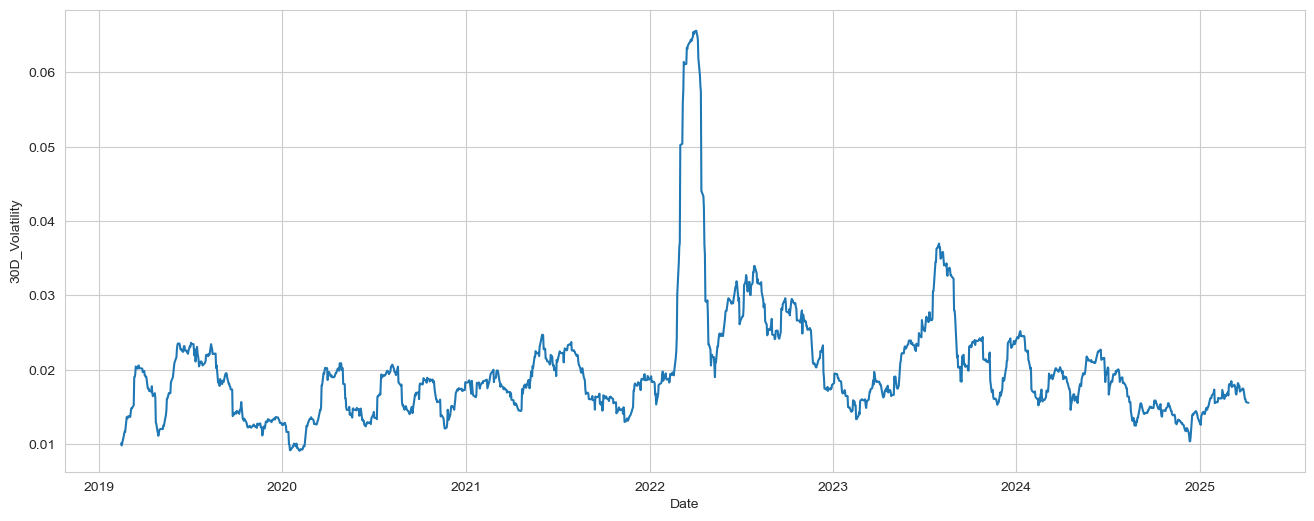

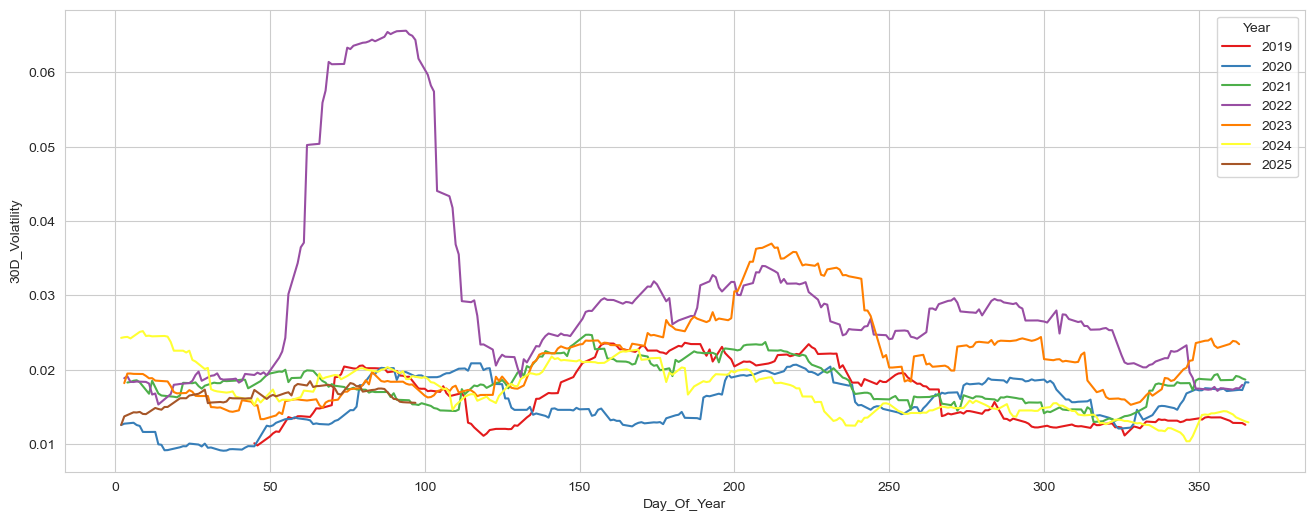

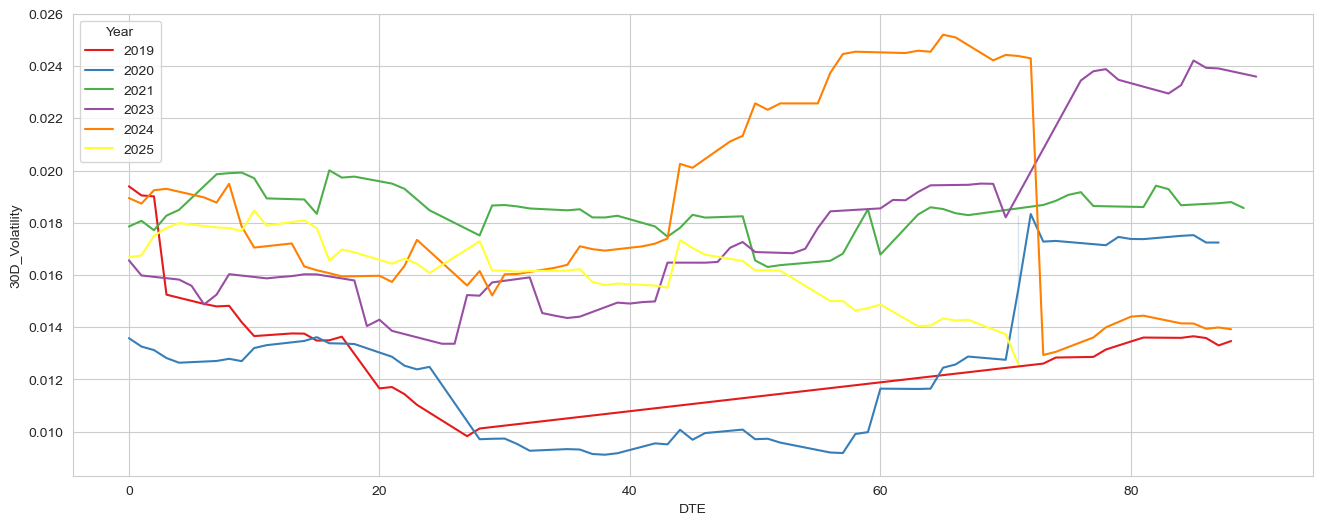

In [175]:
plt.figure(figsize=(16, 6))
sns.lineplot(x = 'Date', y = '30D_Volatility', data = SRW_data)
plt.show()

plt.figure(figsize=(16, 6))
sns.lineplot(x = 'Day_Of_Year', y = '30D_Volatility', data = SRW_data, hue = 'Year', palette='Set1')
plt.show()

SRW_data_without_2022 = SRW_data[(SRW_data['Year'] != 2022) & (SRW_data.Expiry_Month==3)]
plt.figure(figsize=(16, 6))
sns.lineplot(x = 'DTE', y = '30D_Volatility', data = SRW_data_without_2022, hue = 'Year', palette='Set1')
plt.show()